## CMPE482 - Assignment 4

### 9.3

#### (a) Draw Hello Graph

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import numpy.linalg as LA
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300

In [3]:
_H = np.ones((8,6),dtype=np.int);
_H[0:3,2:4] = 0;
_H[5:8,2:4] = 0;

In [4]:
_E = np.ones((8,6),dtype=np.int);
_E[2,2:6] = 0;
_E[5,2:6] = 0;

In [5]:
_L = np.ones((8,6),dtype=np.int);
_L[0:6,2:6] = 0;

In [6]:
_O = np.ones((8,6),dtype=np.int);
_O[2:6,2:4] = 0;

In [7]:
A = np.zeros((15,40),dtype=np.int);
A[1:9,1:7] = _H;
A[2:10,9:15] = _E;
A[3:11,17:23] = _L;
A[4:12,25:31] = _L;
A[5:13,33:39] = _O;

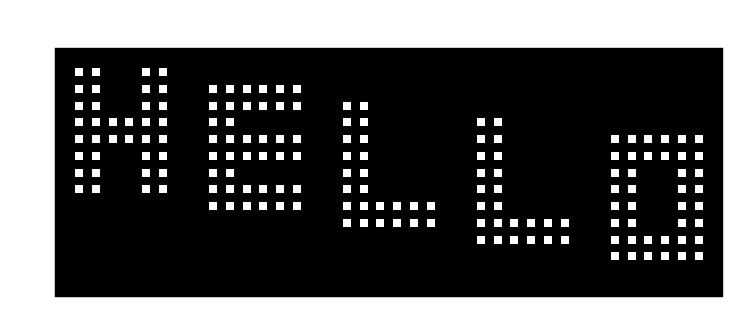

In [8]:
plt.spy(A,markersize = 3);

#### (b) Plot Singular Values

In [12]:
U,S,V = LA.svd(A, full_matrices=False)
print ("Singular values:\n\n",S)

Singular values:

 [1.03832691e+01 5.13177886e+00 3.18775603e+00 2.93826395e+00
 2.06251517e+00 1.83760006e+00 1.22698575e+00 9.87917873e-01
 7.37985369e-01 6.32884999e-01 5.77976000e-16 2.58167644e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [13]:
rank_A = LA.matrix_rank(A)
print ("Rank of A: ", rank_A)

Rank of A:  10


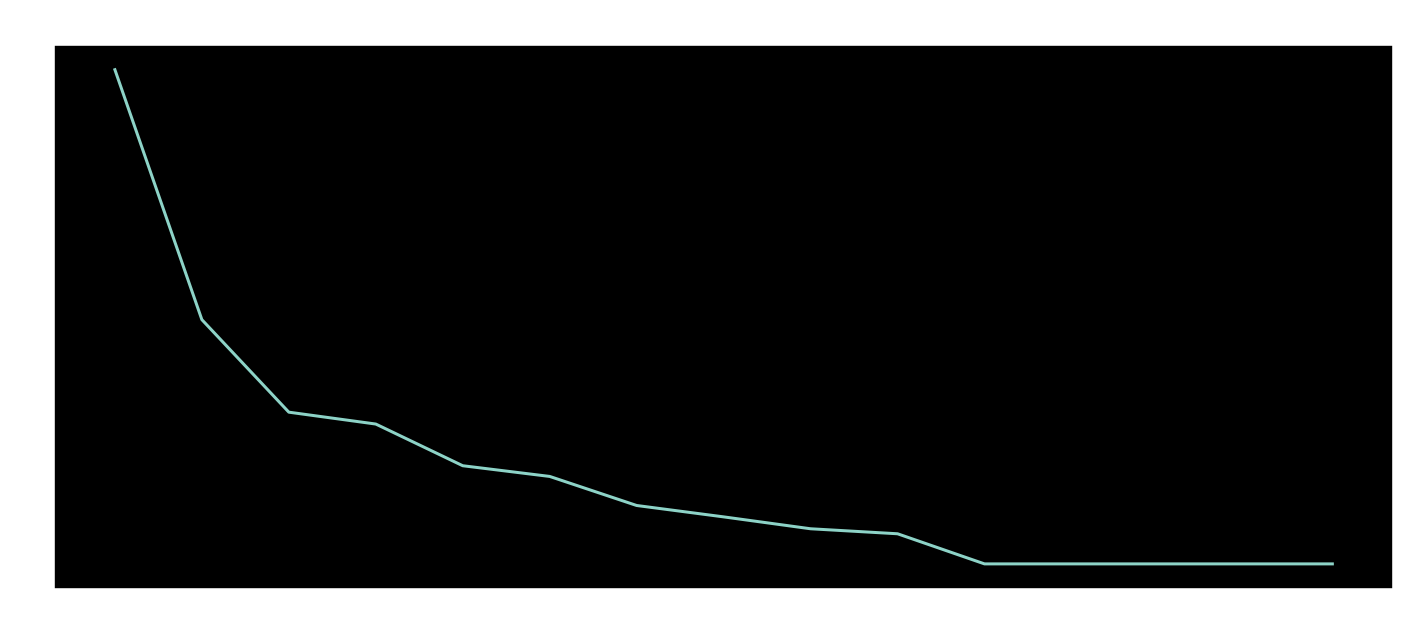

In [14]:
plt.figure(figsize=(12,5))
plt.title("Singular Values")
plt.plot(S)
plt.show()

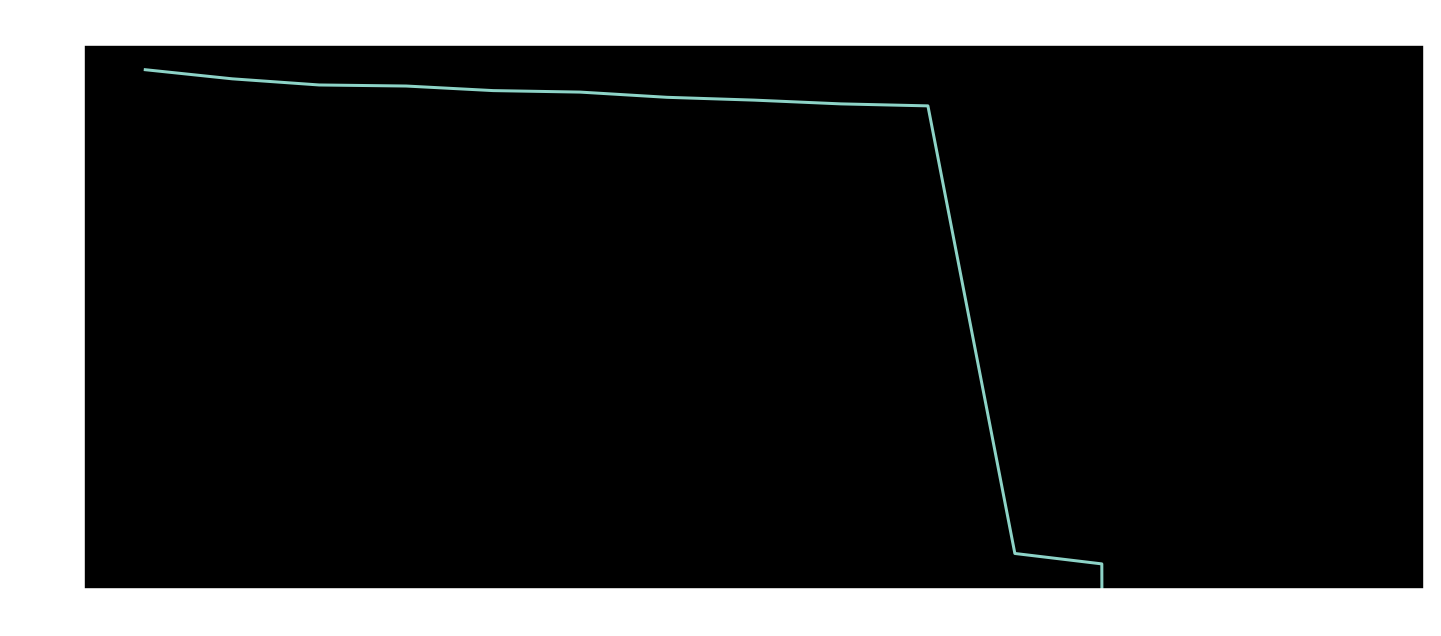

In [15]:
plt.figure(figsize=(12,5))
plt.title("Log - Singular Values");
plt.semilogy(S);
plt.show()

Matrix $A$ has 15 row, therefore it has 15 singular values. On the other hand, it has 10 singular values that are greater than 0, so its rank is 10.

#### (c) Low rank approximations

Let $B$ be the best approximation with rank $k$ that minimizes 2 norm. Then $B = \sum^k_{i=1} \sigma_i u_i v^*_i $.

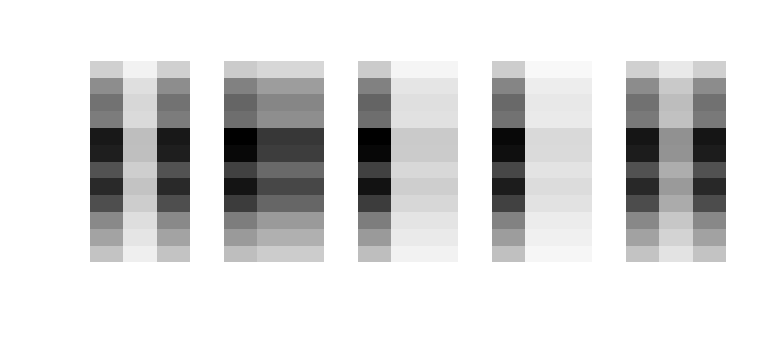

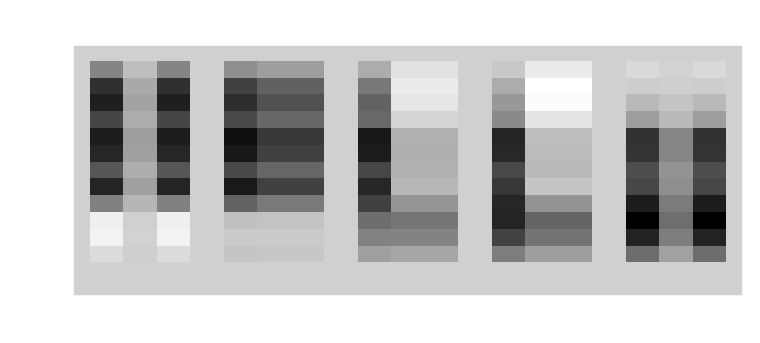

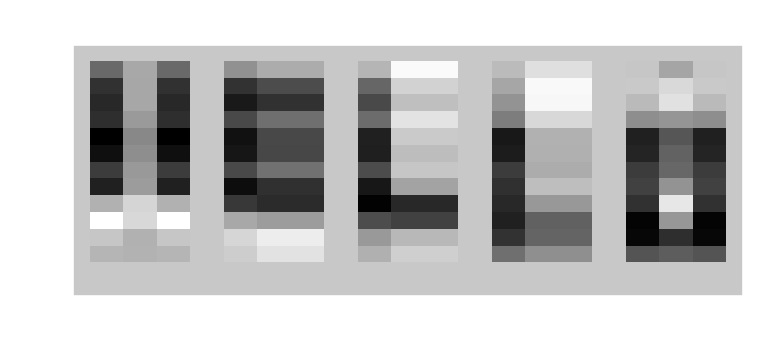

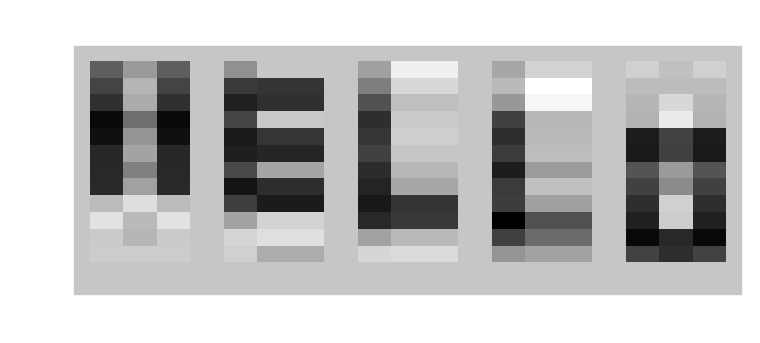

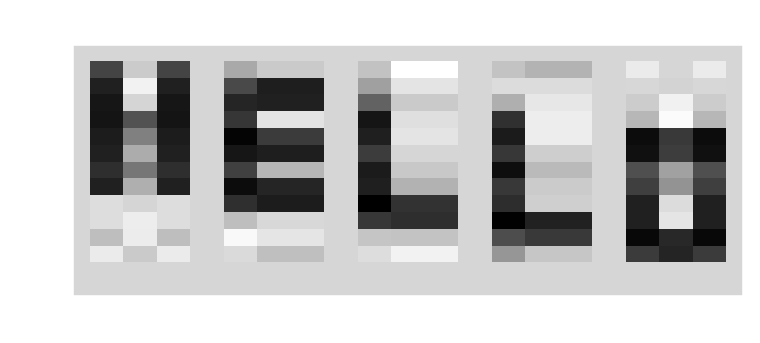

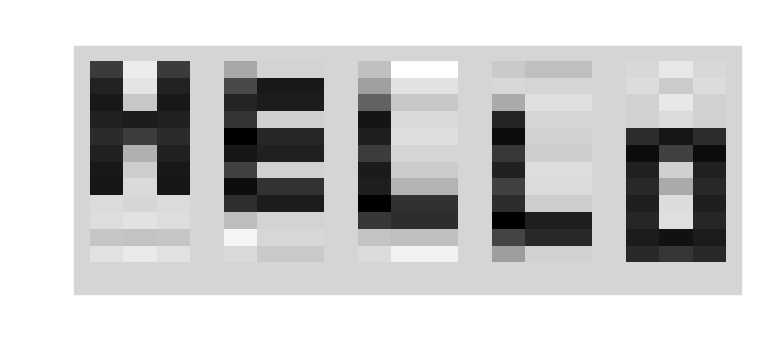

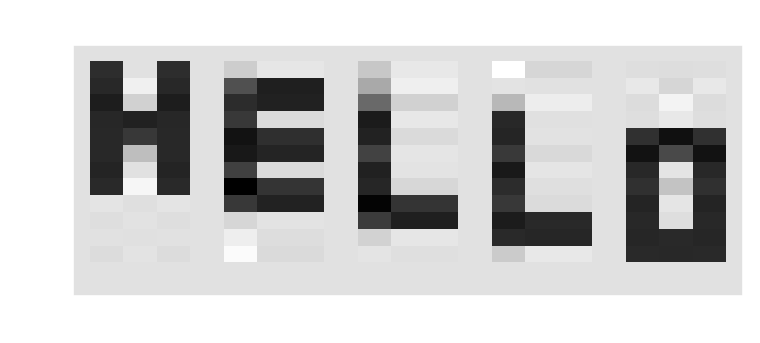

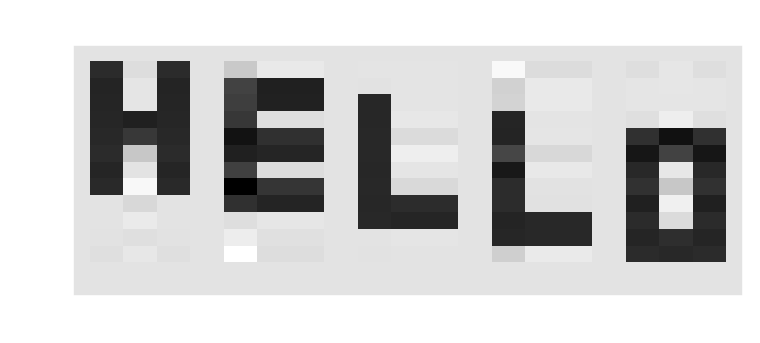

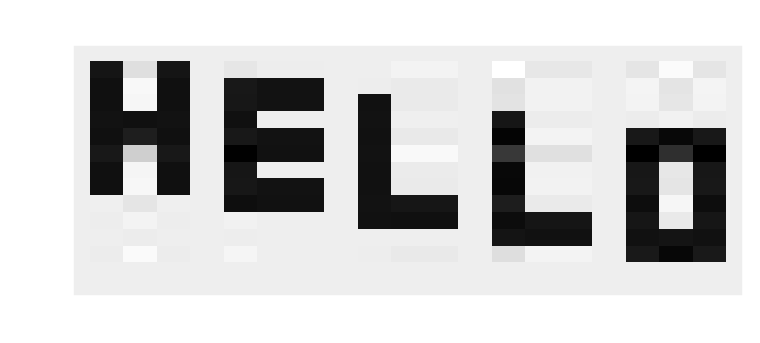

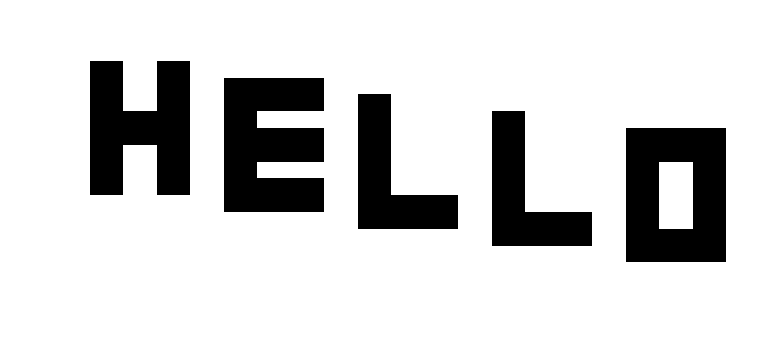

In [16]:
B = np.zeros((15,40),dtype=np.float);
for i in range(rank_A):
    B += S[i]*np.einsum("i,j->ij",U[:,i],V[i,:]);
    plt.imshow(B,cmap="gray_r",interpolation="none");
    plt.title('Approximation with rank = ' + str(i+1));
    plt.show();

### 10.4

#### (a)

Let $e_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $e_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$. And let $A$ be any $2 \times 2$ matrix. If $A = \begin{bmatrix} a_1 \mid a_2 \end{bmatrix}$, then

\begin{equation}
\begin{split}
Ae_1 &= a_1 \\
Ae_2 &= a_2
\end{split}
\end{equation}

Therefore, the linear transformation that $A$ defines for any vector $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$,

$$
Ax = x_1 a_1 + x_2 a_2
$$

is characterized exactly by transformation of the standard basis.

$J = \begin{bmatrix} c & s \\ -s & c \end{bmatrix}$, then J makes the following transformation to basis,

\begin{equation}
\begin{split}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} & \to \begin{bmatrix} c \\ -s \end{bmatrix} \\
\begin{bmatrix} 0 \\ 1 \end{bmatrix} & \to \begin{bmatrix} s \\ c \end{bmatrix} \\
\end{split}
\end{equation}

which is a clockwise rotation by angle $\theta$. And

$$
F = \begin{bmatrix} -c & s \\ s & c \end{bmatrix} = \begin{bmatrix} c & s \\ -s & c \end{bmatrix} 
\begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix} = J \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}
$$

which means F, firstly reflects the point from y axis, then rotates it by angle $\theta$.

In [17]:
J = lambda theta: np.array([[np.cos(theta) , np.sin(theta)] , [-np.sin(theta) , np.cos(theta)]]); # rotator
F = lambda theta: np.array([[-np.cos(theta) , np.sin(theta)] , [np.sin(theta) , np.cos(theta)]]); # reflector

In [18]:
e1 = np.eye(2)[:,0];
e2 = np.eye(2)[:,1];

theta = np.pi/8;
F_theta = F(theta);
J_theta = J(theta);

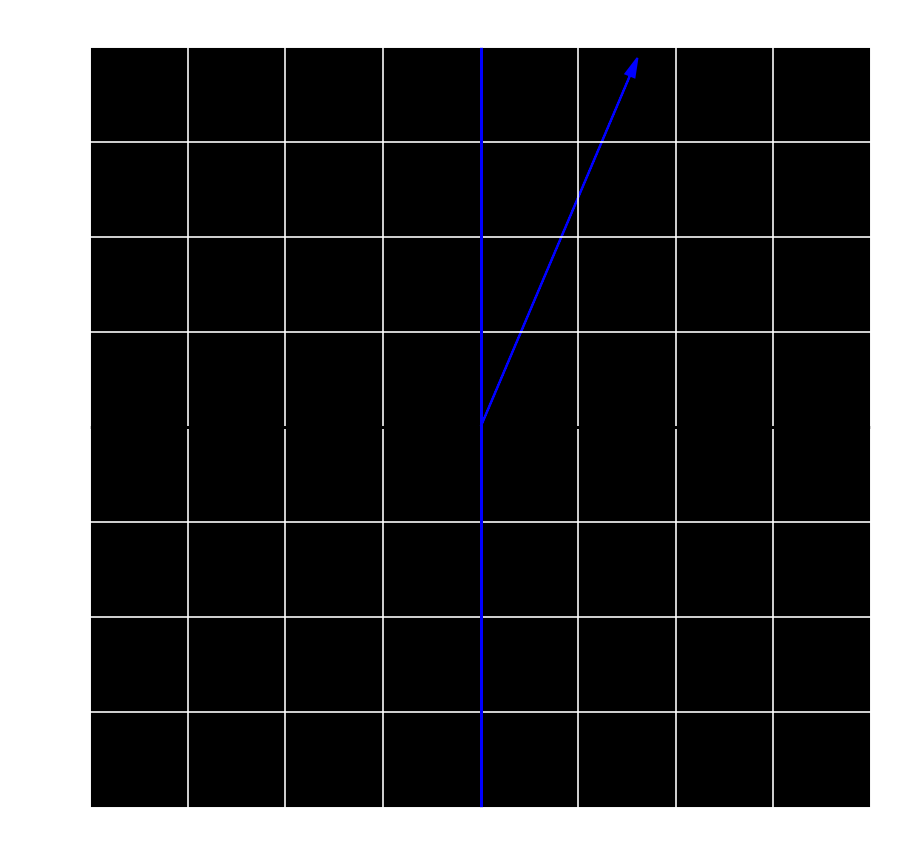

In [20]:
plt.figure(figsize=(7,7))
plt.arrow(0, 0, J_theta[0,0], J_theta[1,0], head_width=0.025, head_length=0.05, fc='k', ec='k', label="$e_1$")
plt.arrow(0, 0, J_theta[0,1], J_theta[1,1], head_width=0.025, head_length=0.05, fc='b', ec='b', label="$e_2$")
plt.grid(True)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='b')
plt.title("Rotation of Standard Basis vectors $e_1$ and $e_2$")
plt.show()

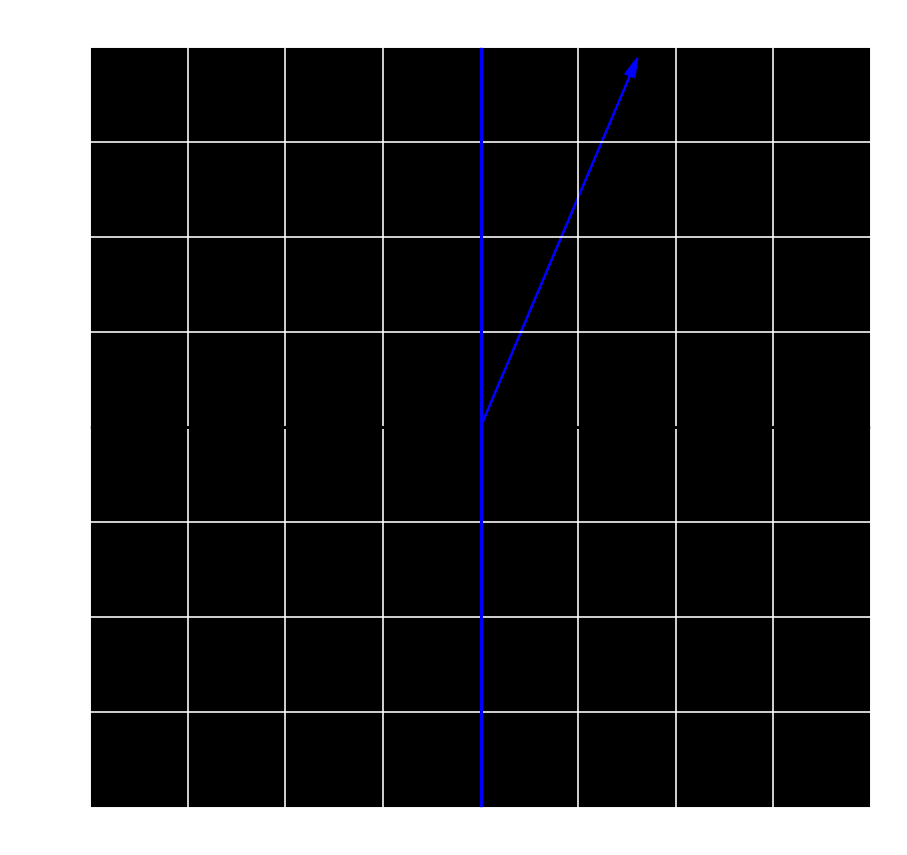

In [21]:
plt.figure(figsize=(7,7))
plt.arrow(0, 0, F_theta[0,0], F_theta[1,0], head_width=0.025, head_length=0.05, fc='k', ec='k', label="$e_1$")
plt.arrow(0, 0, F_theta[0,1], F_theta[1,1], head_width=0.025, head_length=0.05, fc='b', ec='b', label="$e_2$")
plt.grid(True)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='b')
plt.title("Reflection of Standard Basis vectors $e_1$ and $e_2$")
plt.show()

#### (b) QR decomposition by Givens Rotations

Without lost of generality, let $A$ be an $m \times n$ matrix with $m \leq n$. And $Q_{ij}$ be the matrix making $a_{ij}$ entry of the matrix 0. Then,

\begin{equation}
\begin{split}
Q_{ij} = 
\begin{bmatrix} 
I_{i-2} & 0 & 0 \\
0 & J_\theta & 0 \\
0 & 0 & I_{m-i}
\end{bmatrix}
\end{split}
\end{equation}

where $cos{\theta} = \dfrac{a_{i-1,j}}{\sqrt{a^2_{i-1,j}+a^2_{i,j}}}$ and $sin{\theta} = \dfrac{-a_{i,j}}{\sqrt{a^2_{i-1,j}+a^2_{i,j}}}$.

$Q_{ij}^*Q_{ij} = I$, therefore $Q_{ij}$ is unitary. Then following algorithm decomposes $A$ into $QR$:


>```python
R = A;
Q = I;
for j = 1,2,...,n:
    for i= m,m-1,...,2:
        R = Q_ij * R;
        Q = Q_ij * Q;
}
Q = transpose(Q);
```

And because $Q_{ij}$ matrices has a special form, we do not need to multiply matrices explicitly, instead we could rotate corresponding 2d vectors.

### 11.3

In [22]:
m = 50;
n = 12;
t = np.linspace(0,1,m);
A = np.vander(t,n);
b = np.cos(4*t);

#### (a) Normal Equations

In [23]:
L = LA.cholesky(A.T.dot(A));
Ab = A.T.dot(b);
w = LA.solve(L,Ab);
x_a = LA.solve(L.T,w);

Coefficients:
 [ 1.07645471e-01 -4.82711802e-01  2.65650915e-01  1.34165279e+00
  2.21827269e-01 -5.80885443e+00  4.30372938e-02  1.06568867e+01
  1.31072290e-03 -8.00009102e+00  2.46981977e-06  9.99999991e-01]


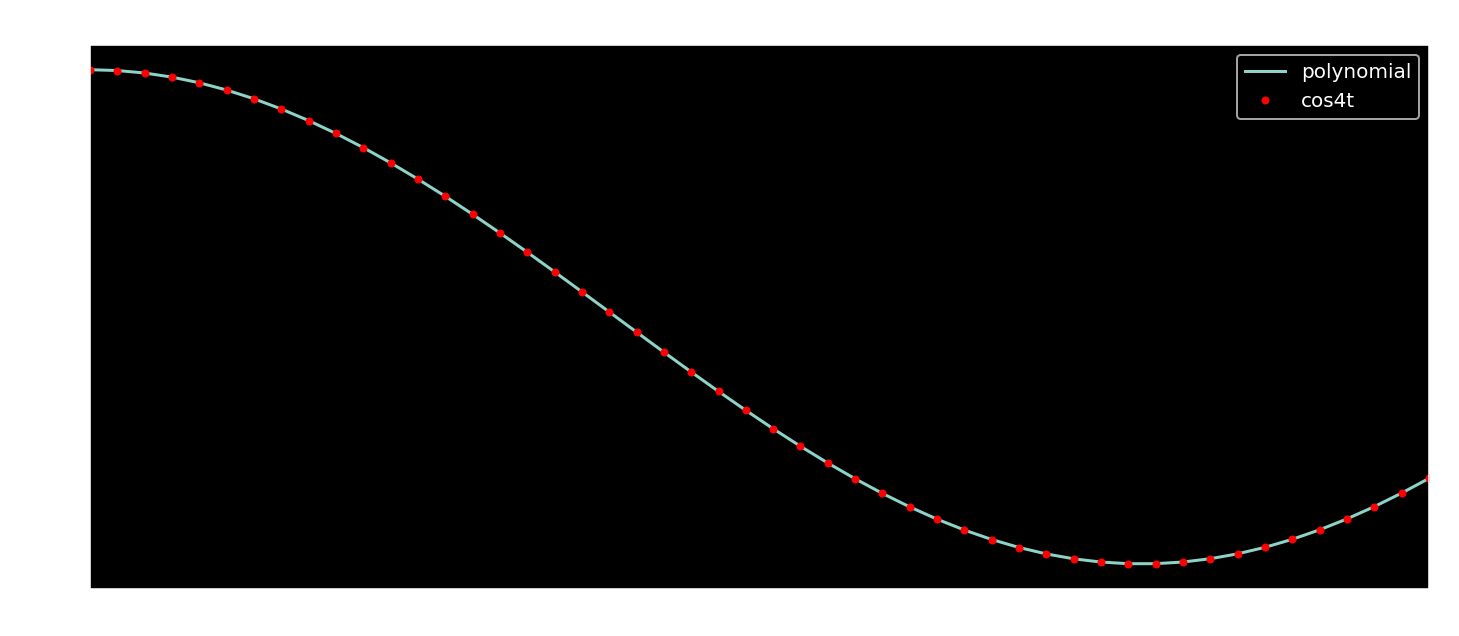

In [24]:
print ("Coefficients:\n",x_a)
plt.figure(figsize=(12,5))
plt.plot(t,np.polyval(x_a,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("Householder QR decomposition");
plt.legend();

#### (b)  Modified Gram-Schmidt

In [25]:
def mgs(A):
    m,n = A.shape;
    Q = np.zeros([m,n],dtype=np.float);
    R = np.zeros([n,n],dtype=np.float);
    for j in range(n):
        v  = A[:,j];
        for i in range(j):
            R[i,j] = Q[:,i].T.dot(v);
            v = v - R[i,j]*Q[:,i];
        R[j,j] = LA.norm(v);
        Q[:,j] = v / R[j,j];
    return Q, R

In [26]:
Q,R = mgs(A);
x_b = LA.solve(R,Q.T.dot(b))

Coefficients:
 [ 8.53620986e-02 -3.59386716e-01 -2.96195041e-02  1.74208920e+00
 -1.16395900e-01 -5.62461516e+00 -2.17537332e-02  1.06711917e+01
 -5.49223325e-04 -7.99996556e+00 -8.41319866e-07  1.00000000e+00]


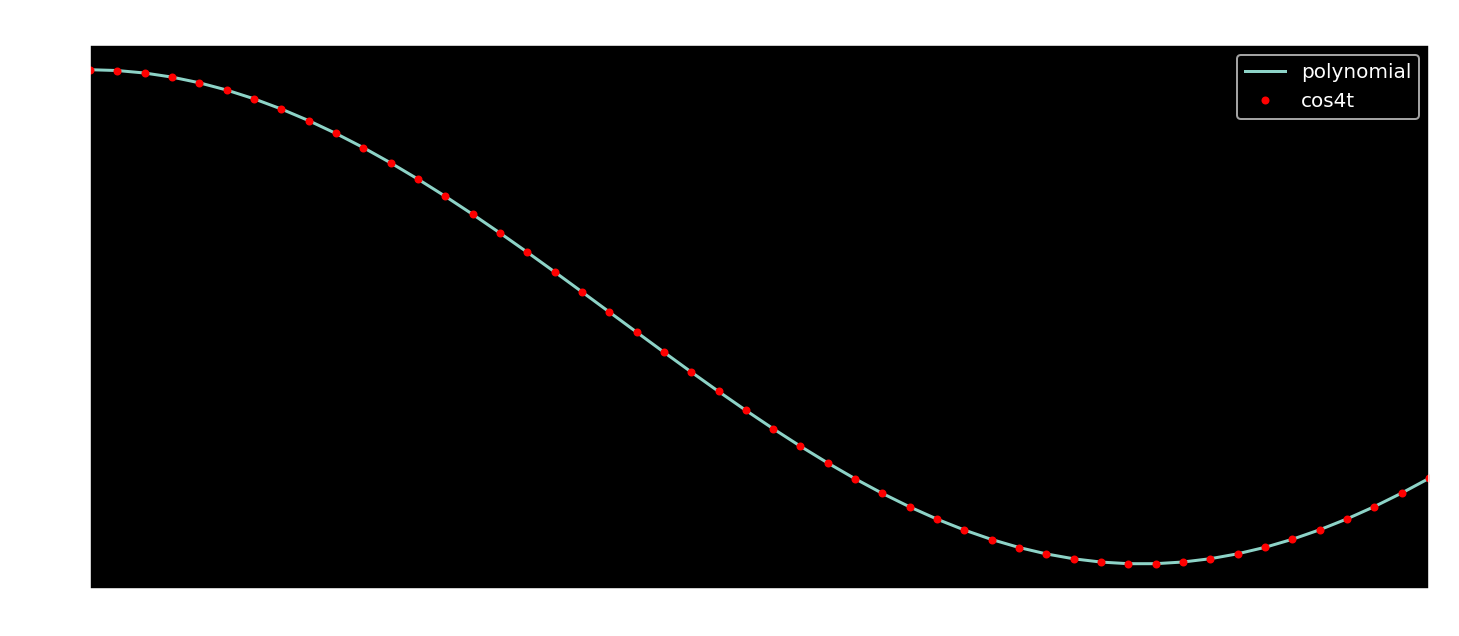

In [27]:
print ("Coefficients:\n",x_b)
plt.figure(figsize=(12,5))
plt.plot(t,np.polyval(x_b,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("Modified Gram-Schmidt");
plt.legend();

#### (c) Householder QR factorization

In [28]:
def sign(x): 
    return 2*(x>=0) - 1;

In [29]:
def house(A):
    m,n = A.shape;
    V = np.zeros([m,n],dtype=np.float);
    R = np.empty([m,n],dtype=np.float);
    R[:] = A;
    for k in range(n):
        v = R[k:,k].ravel();
        v[0] = sign(v[0])*LA.norm(v) + v[0];
        v /= LA.norm(v);
        V[k:,k] = v;
        R[k:, k:] = R[k:, k:] - 2 * np.einsum("i,j,jk->ik",v, v, R[k:,k:]);

    Q = np.eye(m,n);
    for j in range(n):
        for k in range(n)[::-1]:
            Q[k:,j] = Q[k:,j] - 2 * np.einsum("i,i->",V[k:, k],Q[k:,j]) * V[k:, k];
    return Q,R[:n,:]

In [30]:
Q,R = house(A);
x_c = LA.solve(R,Q.T.dot(b));

Coefficients:
 [ 8.80405761e-02 -3.74241703e-01  6.03210823e-03  1.69360696e+00
 -7.53160259e-02 -5.64707563e+00 -1.38202886e-02  1.06694308e+01
 -3.18763260e-04 -7.99998124e+00 -4.22743084e-07  1.00000000e+00]


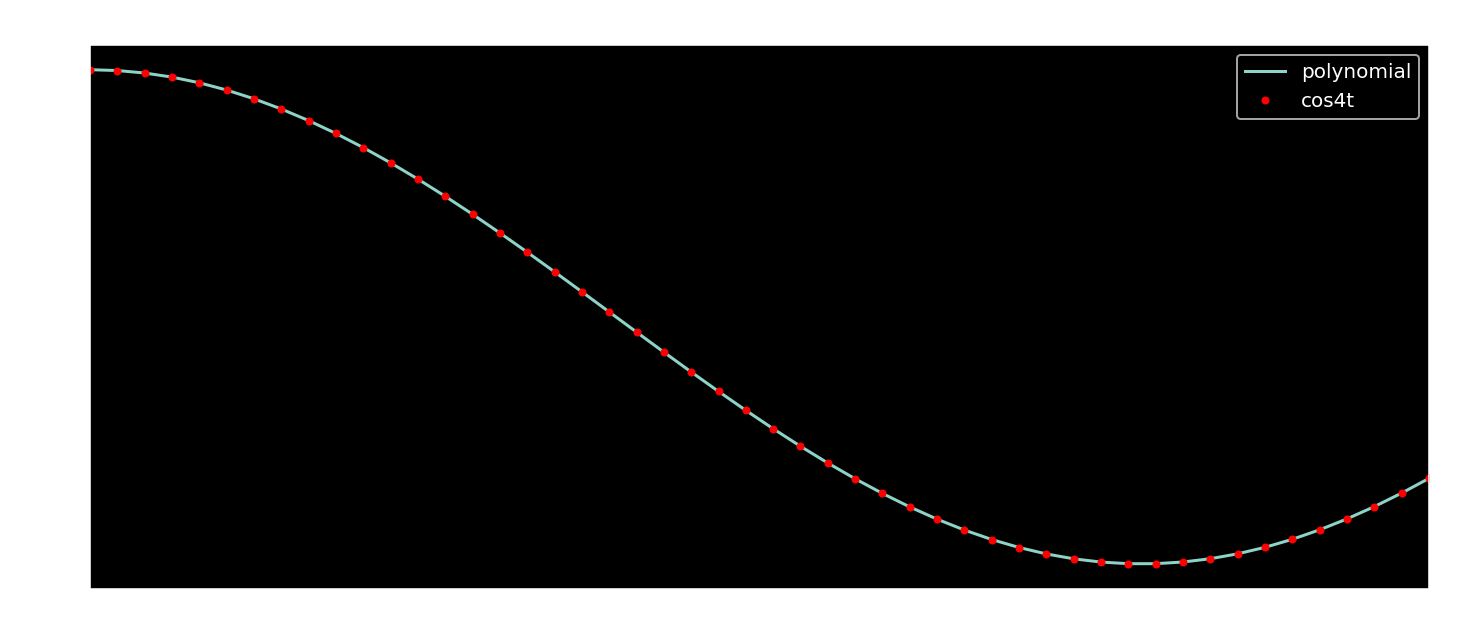

In [31]:
print ("Coefficients:\n",x_c)
plt.figure(figsize=(12,5))
plt.plot(t,np.polyval(x_c,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("Householder QR decomposition");
plt.legend();

#### (d) Numpy Householder QR

In [32]:
Q,R = LA.qr(A);
x_d = LA.solve(R,Q.T.dot(b));

Coefficients:
 [ 8.80405768e-02 -3.74241708e-01  6.03211886e-03  1.69360695e+00
 -7.53160119e-02 -5.64707563e+00 -1.38202853e-02  1.06694308e+01
 -3.18763136e-04 -7.99998124e+00 -4.22742684e-07  1.00000000e+00]


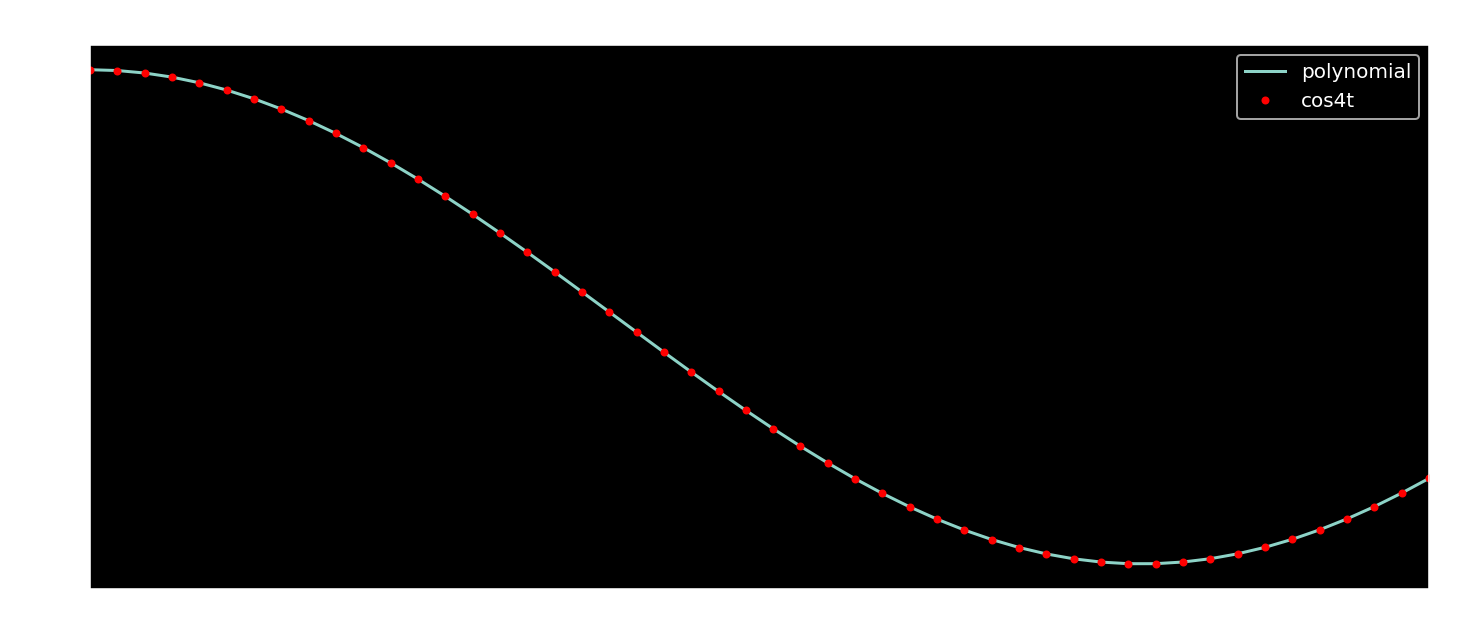

In [33]:
print ("Coefficients:\n",x_d)
plt.figure(figsize=(12,5))
plt.plot(t,np.polyval(x_d,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("Numpy Householder QR decomposition");
plt.legend();

#### (e) numpy.linalg.lstsq

In [34]:
x_e = LA.lstsq(A,b)[0];

/Users/onurpoyraz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


Coefficients:
 [ 8.80405764e-02 -3.74241705e-01  6.03211370e-03  1.69360696e+00
 -7.53160179e-02 -5.64707563e+00 -1.38202865e-02  1.06694308e+01
 -3.18763168e-04 -7.99998124e+00 -4.22742734e-07  1.00000000e+00]


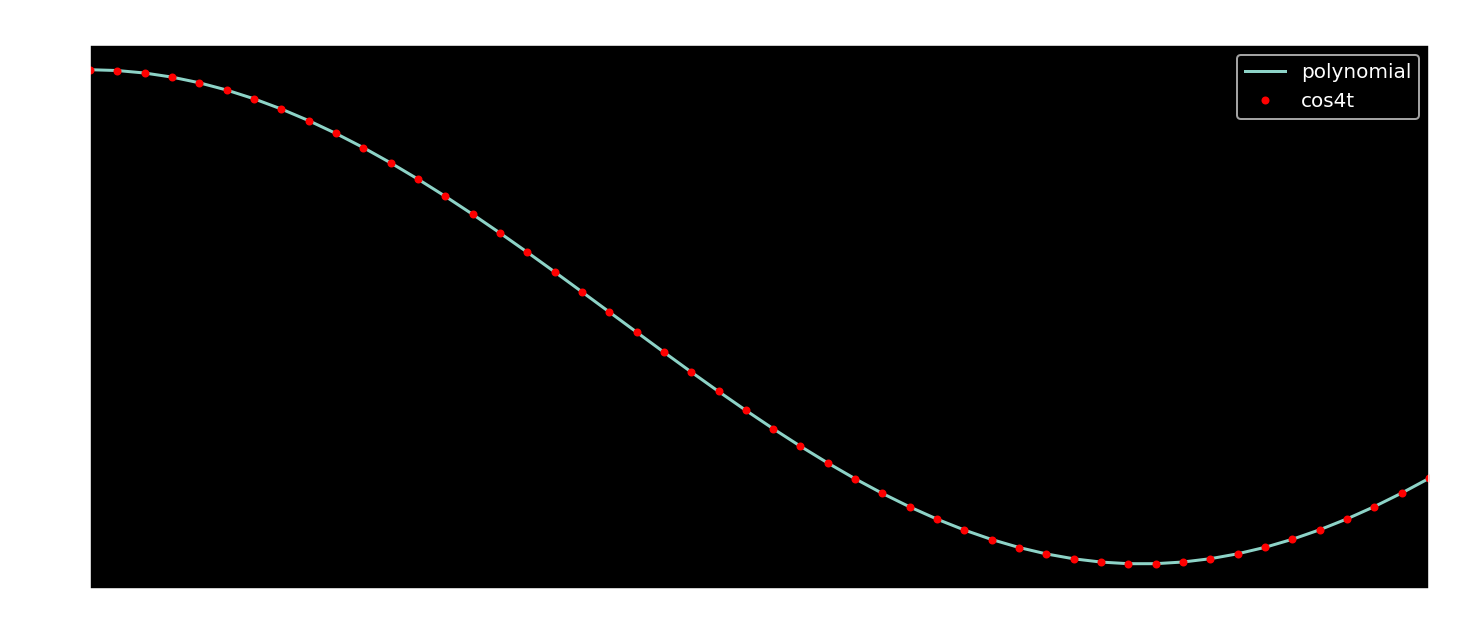

In [35]:
print ("Coefficients:\n",x_e)
plt.figure(figsize=(12,5))
plt.plot(t,np.polyval(x_e,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("Numpy Least Squares");
plt.legend();

#### (f) SVD

In [36]:
U,S,V = LA.svd(A, full_matrices=False);
x_f = (V.T).dot(np.diag(1/S)).dot(U.T).dot(b);

Coefficients:
 [ 8.80405767e-02 -3.74241707e-01  6.03211683e-03  1.69360695e+00
 -7.53160145e-02 -5.64707563e+00 -1.38202858e-02  1.06694308e+01
 -3.18763143e-04 -7.99998124e+00 -4.22742680e-07  1.00000000e+00]


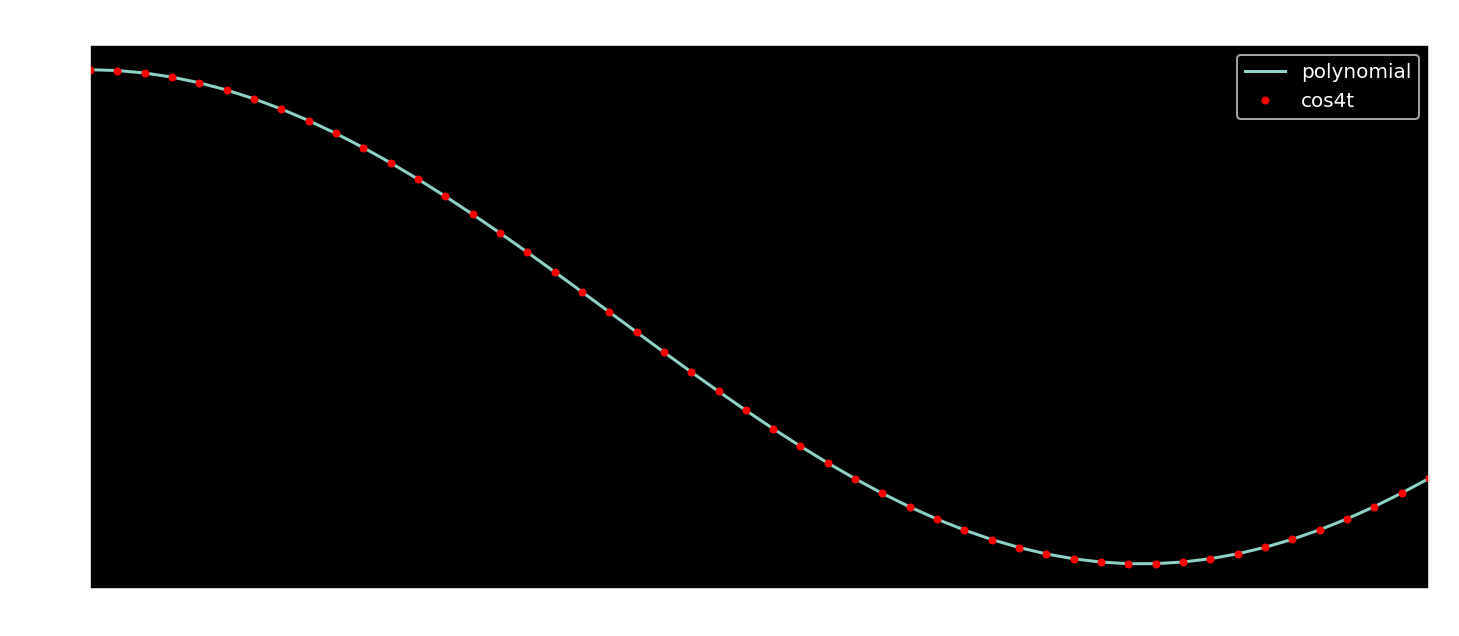

In [37]:
print ("Coefficients:\n",x_f)
plt.figure(figsize=(12,5))
plt.plot(t,np.polyval(x_f,t),label="polynomial");
plt.plot(t,b,"r.",label="cos4t");
plt.ylim([-1.1,1.1]);
plt.xlim([0,1]);
plt.title("SVD");
plt.legend();

#### (g) Observations

Coefficients on a colormap looks smooth. They are nearly same.

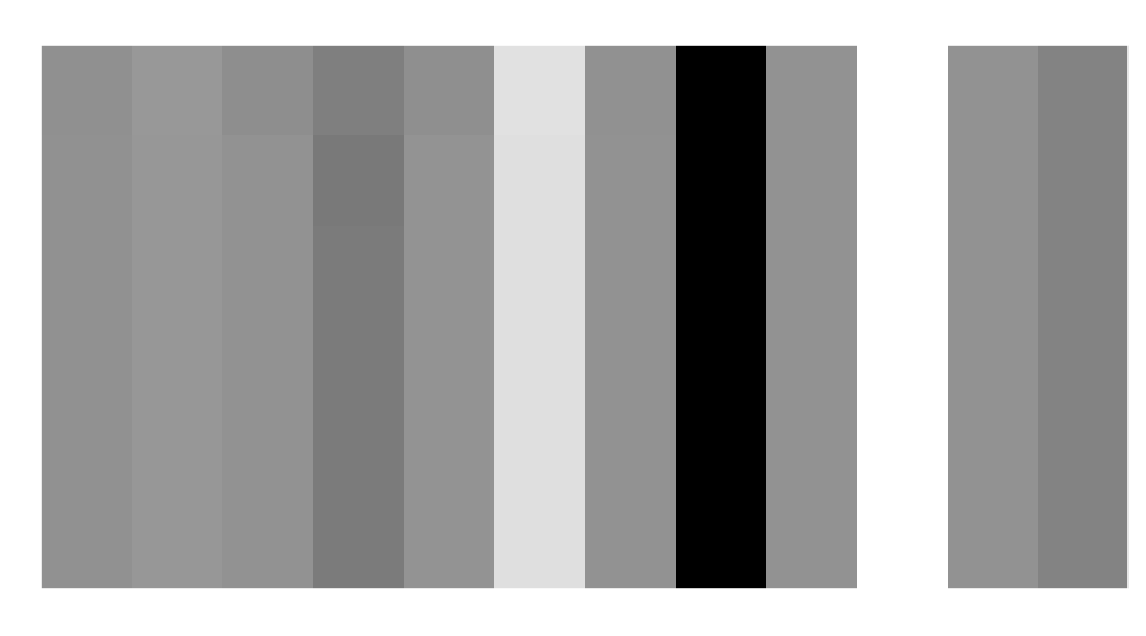

In [38]:
B = np.array([x_a,x_b,x_c,x_d,x_e,x_f]);
plt.figure(figsize=(12,5))
plt.imshow(B,cmap="gray_r",interpolation="none");
plt.title("Coefficients");
plt.show()

But, if we plot their difference from the mean, first and second methods are looks more different. Because they are numerically less stable methods.

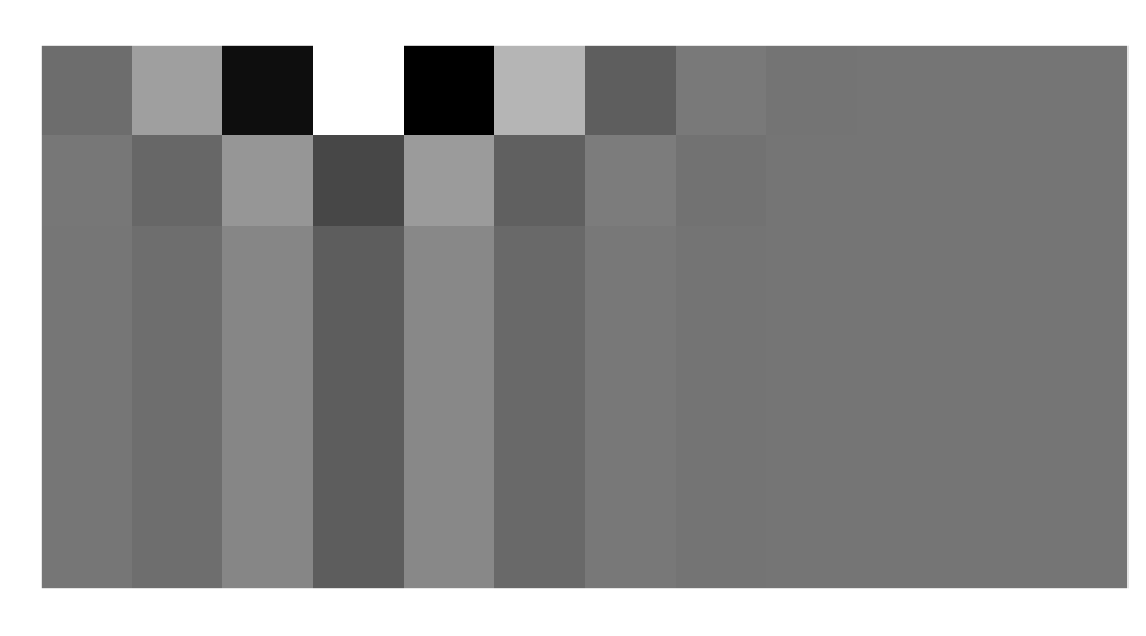

In [39]:
D = B - np.mean(B,axis=0);
plt.figure(figsize=(12,5))
plt.imshow(D,cmap="gray_r",interpolation="none");
plt.title("Difference of Mean and Coefficients");
plt.show()